#### Imports and load data

In [1]:
from google.cloud import storage
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
storage_client = storage.Client()
bucket = storage_client.bucket('soundboard_data_sampleswap')

In [3]:
piano_blobs = bucket.list_blobs(prefix="INSTRUMENTS (SINGLE SAMPLES)/Piano and Epiano/", delimiter='/')
synth_blobs = bucket.list_blobs(prefix="INSTRUMENTS (SINGLE SAMPLES)/Synth/", delimiter='/')
pads_blobs = bucket.list_blobs(prefix="INSTRUMENTS (SINGLE SAMPLES)/Pads/", delimiter='/')

#### Save audio to local file, view spectrogram

In [4]:
for blob in piano_blobs:
    if '.' in blob.name:
        print(blob.name)


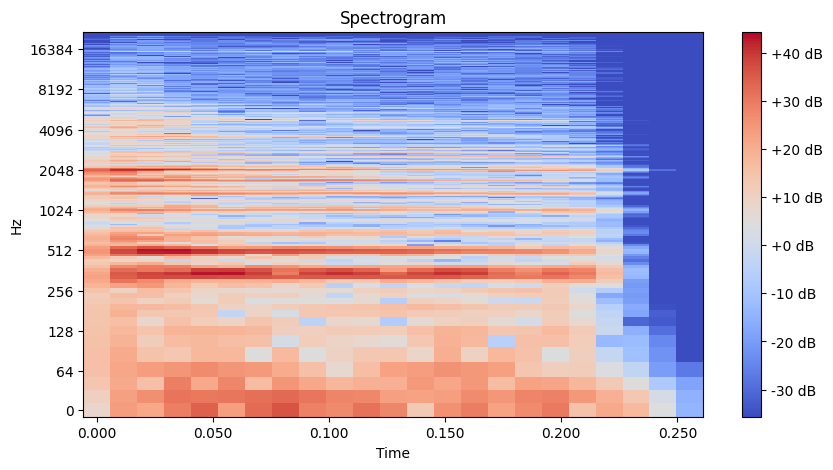

In [5]:
# Load the audio file
audio_file_path = '../data/SAMPLESWAP/INSTRUMENTS (SINGLE SAMPLES)/Piano and Epiano/bluespianopunch.wav'
y, sr = librosa.load(audio_file_path, sr=None)

# Extract the spectrogram
spectrogram = librosa.stft(y)
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))

# Visualize the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


#### Save Sample Swap instruments into target classes 

In [28]:
keys = ['/Piano and Epiano', '/Synth', '/Organs']
strings = ['/Guitars','/Far East Drones and Plucks','/Vermilion Guitar Noizes']